In [1]:
import os
from kedro.framework.startup import bootstrap_project
from kedro.framework.session import KedroSession
import warnings

warnings.filterwarnings("ignore")

# Encontrar o caminho absoluto do diretório atual
notebook_cwd = os.getcwd()

# Definir o caminho correto para a raiz do projeto Kedro
project_path = r"c:\Users\gufer\OneDrive\Documentos\FIAP\Fase_03\mtg-project"

# Verificar o diretório atual e o caminho do projeto
print(f"Notebook current working directory: {notebook_cwd}")
print(f"Project path: {project_path}")

# Alterar para o diretório raiz do projeto Kedro
os.chdir(project_path)

# Bootstrap o projeto Kedro
bootstrap_project(project_path)

# Inicialize o contexto do Kedro
with KedroSession.create() as session:
    context = session.load_context()

# Recarregar o catálogo
catalog = context.catalog

# Acessar os parâmetros
params = context.params

# Listar o catálogo
catalog.list()

[09/19/24 20:30:01] INFO     Using                                                                  ]8;id=102988;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\framework\project\__init__.py\__init__.py]8;;\:]8;id=932481;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\framework\project\__init__.py#249\249]8;;\
                             'c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\framew                
                             ork\project\rich_logging.yml' as logging configuration.                               

Notebook current working directory: c:\Users\gufer\OneDrive\Documentos\FIAP\Fase_03\mtg-project\notebooks\gmferratti\pipeline
Project path: c:\Users\gufer\OneDrive\Documentos\FIAP\Fase_03\mtg-project


[09/19/24 20:30:05] INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=778340;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro_telemetry\plugin.py\plugin.py]8;;\:]8;id=769860;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro_telemetry\plugin.py#233\233]8;;\
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         


[
    'decks_json_partitioned',
    'decks_txt_partitioned',
    'sampled_decks',
    'players',
    'players_with_decks',
    'matches_df',
    'features_df',
    'selected_features_df',
    'selected_features_cols',
    'train_features',
    'test_features',
    'train_target',
    'test_target',
    'best_model',
    'best_hiper_params',
    'predicted_target',
    'shap_values',
    'error_metrics',
    'graph_objects',
    'parameters',
    'params:global',
    'params:global.user',
    'params:global.user.project_path',
    'params:preprocessing',
    'params:preprocessing.webscraper',
    'params:preprocessing.webscraper.zip_url',
    'params:preprocessing.webscraper.zip_folder',
    'params:preprocessing.webscraper.log_folder',
    'params:preprocessing.webscraper.deck_cards',
    'params:preprocessing.webscraper.sample_size_ratio',
    'params:simulation',
    'params:simulation.n_players',
    'params:simulation.matches_per_player',
    'params:simulation.hand_size_stop',
  

In [2]:
from typing import List, Dict
from classes.deck import Deck
from classes.player import Player
from classes.player_tracker import PlayerTracker
from src.mtg_project.pipelines.utils import setup_logger
import pandas as pd
import numpy as np
from faker import Faker
import random

In [27]:

def get_last_file(partitioned_data):
    """
    Obtém o last file da partição mais recente de um PartitionedDataset.

    Args:
        partitioned_data (dict): Dicionário com as partições de dados.

    Returns:
        Any: O ultimo arquivo da partição mais recente.
    """
    # Obter a chave da partição mais recente
    latest_partition = max(partitioned_data.keys())
    
    # Obter os dados da partição mais recente
    data = partitioned_data[latest_partition]
    
    return data

In [28]:
with KedroSession.create(env="local", project_path=project_path) as session:
    session.run(pipeline_name="modeling")

[09/19/24 20:27:41] INFO     Kedro project mtg-project                                               ]8;id=993241;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\framework\session\session.py\session.py]8;;\:]8;id=554656;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\framework\session\session.py#327\327]8;;\

[09/19/24 20:27:42] INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=821364;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro_telemetry\plugin.py\plugin.py]8;;\:]8;id=829754;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro_telemetry\plugin.py#233\233]8;;\
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

                    INFO     Using synchronous mode for loading and saving data. Use the    ]8;id=420898;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\runner\sequential_runner.py\sequential_runner.py]8;;\:]8;id=387797;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\runner\sequential_runner.py#67\67]8;;\
                             --async flag for potential performance gains.                                         
                             https://docs.kedro.org/en/stable/nodes_and_pipelines/run_a_pip                        
                             eline.html#load-and-save-asynchronously                                               

                    INFO     Loading data from matches_df (PartitionedDataset)...               ]8;id=533876;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=533265;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\

                    INFO     Running node: feature_engineering_node: feature_engineering([matches_df])  ]8;id=806419;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\pipeline\node.py\node.py]8;;\:]8;id=810402;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\pipeline\node.py#364\364]8;;\
                             -> [features_df]                                                                      

                    INFO     Saving data to features_df (PartitionedDataset)...                 ]8;id=561940;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=535590;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py#581\581]8;;\

                    INFO     Completed 1 out of 4 tasks                                     ]8;id=442626;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\runner\sequential_runner.py\sequential_runner.py]8;;\:]8;id=856419;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\runner\sequential_runner.py#93\93]8;;\

                    INFO     Loading data from features_df (PartitionedDataset)...              ]8;id=141651;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=46833;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\

                    INFO     Loading data from                                                  ]8;id=227148;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=410632;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\
                             params:modeling.feature_engineering.feat_corr_threshold                               
                             (MemoryDataset)...                                                                    

                    INFO     Running node: feature_selection_node:                                      ]8;id=727419;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\pipeline\node.py\node.py]8;;\:]8;id=552536;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\pipeline\node.py#364\364]8;;\
                             feature_selection([features_df;params:modeling.feature_engineering.feat_co            
                             rr_threshold]) -> [selected_features_df;selected_features_cols]                       

                    INFO     Saving data to selected_features_df (PartitionedDataset)...        ]8;id=110281;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=620201;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py#581\581]8;;\

                    INFO     Saving data to selected_features_cols (PartitionedDataset)...      ]8;id=133220;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=956557;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py#581\581]8;;\

                    INFO     Completed 2 out of 4 tasks                                     ]8;id=8340;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\runner\sequential_runner.py\sequential_runner.py]8;;\:]8;id=215415;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\runner\sequential_runner.py#93\93]8;;\

                    INFO     Loading data from selected_features_df (PartitionedDataset)...     ]8;id=220246;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=740945;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\

                    INFO     Loading data from params:modeling.feature_selection.target_column  ]8;id=321967;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=397384;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\
                             (MemoryDataset)...                                                                    

                    INFO     Loading data from selected_features_cols (PartitionedDataset)...   ]8;id=813279;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=120939;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\

                    INFO     Loading data from params:modeling.feature_selection.hide_players   ]8;id=387917;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=79014;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\
                             (MemoryDataset)...                                                                    

                    INFO     Loading data from params:modeling.feature_selection.n_test_players ]8;id=61142;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=194982;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\
                             (MemoryDataset)...                                                                    

                    INFO     Loading data from                                                  ]8;id=216535;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=461592;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\
                             params:modeling.feature_selection.hide_advanced_turns                                 
                             (MemoryDataset)...                                                                    

                    INFO     Loading data from params:modeling.feature_selection.turn_threshold ]8;id=361386;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=217947;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\
                             (MemoryDataset)...                                                                    

                    INFO     Running node: split_train_test_node:                                       ]8;id=499036;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\pipeline\node.py\node.py]8;;\:]8;id=222390;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\pipeline\node.py#364\364]8;;\
                             train_test_split([selected_features_df;params:modeling.feature_selection.t            
                             arget_column;selected_features_cols;params:modeling.feature_selection.hide            
                             _players;params:modeling.feature_selection.n_test_players;params:modeling.            
                             feature_selection.hide_advanced_turns;params:modeling.feature_selection.tu            
                             rn_threshold]) -> [train_features;test_features;train_target;test_target]             

                    INFO     Saving data to train_features (PartitionedDataset)...              ]8;id=46059;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=197874;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py#581\581]8;;\

                    INFO     Saving data to test_features (PartitionedDataset)...               ]8;id=923403;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=808460;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py#581\581]8;;\

[09/19/24 20:27:43] INFO     Saving data to train_target (PartitionedDataset)...                ]8;id=969409;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=953920;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py#581\581]8;;\

                    INFO     Saving data to test_target (PartitionedDataset)...                 ]8;id=801359;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=813791;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py#581\581]8;;\

                    INFO     Completed 3 out of 4 tasks                                     ]8;id=742536;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\runner\sequential_runner.py\sequential_runner.py]8;;\:]8;id=836583;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\runner\sequential_runner.py#93\93]8;;\

                    INFO     Loading data from train_features (PartitionedDataset)...           ]8;id=601430;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=964487;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\

                    INFO     Loading data from train_target (PartitionedDataset)...             ]8;id=926831;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=972591;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\

                    INFO     Loading data from params:modeling.model_selection.params_grid      ]8;id=639265;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=918205;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\
                             (MemoryDataset)...                                                                    

                    INFO     Running node: fit_decision_tree_model_node:                                ]8;id=977602;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\pipeline\node.py\node.py]8;;\:]8;id=196358;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\pipeline\node.py#364\364]8;;\
                             fit_model([train_features;train_target;params:modeling.model_selection.par            
                             ams_grid]) -> [best_model;best_hiper_params]                                          

Fitting 5 folds for each of 1620 candidates, totalling 8100 fits


[09/19/24 20:28:03] INFO     Saving data to best_model (PartitionedDataset)...                  ]8;id=875500;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=23014;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py#581\581]8;;\

                    INFO     Saving data to best_hiper_params (PartitionedDataset)...           ]8;id=621166;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=18966;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py#581\581]8;;\

                    INFO     Completed 4 out of 4 tasks                                     ]8;id=59115;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\runner\sequential_runner.py\sequential_runner.py]8;;\:]8;id=574519;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\runner\sequential_runner.py#93\93]8;;\

                    INFO     Pipeline execution completed successfully.                               ]8;id=316181;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\runner\runner.py\runner.py]8;;\:]8;id=995889;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\runner\runner.py#123\123]8;;\

In [29]:
def create_players(n_players: int):
    """
    Cria uma lista de objetos Player com nomes aleatórios.

    Args:
        n_players (int): Número de jogadores a serem criados.

    Returns:
        List[Player]: Lista de objetos Player com nomes gerados aleatoriamente.
    """
    # Inicializando o gerador de dados falsos Faker
    fake = Faker()
    
    # Gerando uma lista de nomes aleatórios usando o Faker
    player_names = [fake.first_name() + " " + fake.last_name() for _ in range(n_players)]
    
    # Criando uma lista de objetos Player a partir dos nomes gerados
    players = [Player(name) for name in player_names]

    # Retornando a lista de objetos Player
    return players

n_players = catalog.load("params:simulation.n_players")
players = create_players(n_players)
catalog.save("players", players)

                    INFO     Loading data from params:simulation.n_players (MemoryDataset)...   ]8;id=616093;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=638389;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\

                    INFO     Saving data to players (PickleDataset)...                          ]8;id=670360;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=779349;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py#581\581]8;;\

In [30]:
import random
import os
from typing import List, Dict

def assign_decks_to_players(
        players: List[Player], 
        sampled_decks: Dict[str, str],
        log_folder: str) -> List[Player]:
    """
    Função para atribuir decks aleatórios a cada player na lista de players.

    A função tentará atribuir um deck a cada player chamando o método assign_deck().
    Caso ocorra algum erro na atribuição, tentará com outro deck disponível.

    Args:
        players (list): Lista de objetos Player.
        sampled_decks (dict): Dicionário com os nomes e caminhos dos decks.
        log_folder (str): Caminho da pasta para salvar o log.

    Returns:
        List[Player]: Lista de objetos Player com decks atribuídos.
    """
    # Caminho do arquivo de log
    log_filepath = os.path.join(log_folder, 'decks_assignment.txt')

    # Cria a pasta de log se ela não existir
    os.makedirs(log_folder, exist_ok=True)

    # Configura o logger geral
    logger = setup_logger("validate_decks", log_filepath)
    
    # Log de início da validação
    logger.info("Validating decks...")

    # Convertemos as chaves do dicionário para uma lista de nomes de decks disponíveis
    available_decks = list(sampled_decks.keys())
    
    for player in players:
        assigned = False
        while not assigned and available_decks:
            try:
                # Seleciona um deck aleatório da lista de decks disponíveis
                deck_name = random.choice(available_decks)

                # Obter o caminho completo do deck a partir do dicionário sampled_decks
                deck_path = sampled_decks[deck_name]

                # Cria um novo objeto Deck
                deck = Deck()

                # Carrega o deck a partir do arquivo .txt no caminho obtido
                deck.load_deck_from_txt(deck_path)

                # Atribui o deck ao player
                player.assign_deck(deck)
                logger.info(f"Deck '{deck_name}' assigned to player '{player.name}'")
                
                # Remove o deck da lista de decks disponíveis para evitar reutilização
                available_decks.remove(deck_name)

                assigned = True  # Deck atribuído com sucesso
            except Exception as e:
                # Em caso de erro, tenta outro deck
                logger.error(f"Failed to assign deck '{deck_name}' to player '{player.name}': {e}")
                continue
        
        
        # Se não houver mais decks disponíveis e não conseguir atribuir, lança um erro
        if not assigned:
            raise ValueError(f"No available decks left to assign to player '{player.name}'.")

    logger.info("Deck assignment process completed.")

    return players

players = catalog.load("players")
sampled_decks = catalog.load("sampled_decks")
log_folder = catalog.load("params:simulation.log_folder")
# players_with_decks = assign_decks_to_players(players, sampled_decks, log_folder)
# catalog.save("players_with_decks", players_with_decks)

                    INFO     Loading data from players (PickleDataset)...                       ]8;id=193132;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=223875;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\

                    INFO     Loading data from sampled_decks (PickleDataset)...                 ]8;id=773301;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=159666;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\

                    INFO     Loading data from params:simulation.log_folder (MemoryDataset)...  ]8;id=337374;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=571067;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\

In [31]:
def simulate_player_matches(params: dict, players_with_decks: list) -> pd.DataFrame:
    """
    Simulates Magic: The Gathering matches for a list of players based on the provided simulation parameters.

    Parameters:
    -----------
    params : dict
        A dictionary containing the simulation parameters, including:
        - 'max_mulligans': Maximum number of mulligans allowed per player.
        - 'mulligan_prob': Probability of a player choosing to mulligan.
        - 'hand_size_stop': Minimum hand size at which the simulation will stop.
        - 'max_turns': Maximum number of turns per match.
        - 'extra_land_prob': Probability of playing an extra land during a turn.
        - 'matches_per_player': Number of matches to simulate per player.
        - 'log_folder': Folder path for logging the simulation process.
    
    players_with_decks : list
        A list of Player objects, each with an assigned deck to be used in the simulation.

    Returns:
    --------
    pd.DataFrame
        A DataFrame containing the match data for all players across all matches and turns, including:
        - Player attributes at each turn.
        - Match number for each simulation.
    """
    
    # Atribuir os parâmetros
    max_mulligans = params["max_mulligans"]
    mulligan_prob = params["mulligan_prob"]
    hand_size_stop = params["hand_size_stop"]
    max_turns = params["max_turns"]
    extra_land_prob = params["extra_land_prob"]
    matches_per_player = params["matches_per_player"]
    log_folder = params["log_folder"]

    # Caminho do arquivo de log
    log_filepath = os.path.join(log_folder, 'player_matches.txt')

    # Cria a pasta de log se ela não existir
    os.makedirs(log_folder, exist_ok=True)

    # Configura o logger geral
    logger = setup_logger("player_matches", log_filepath)

    # Log de início da validação
    logger.info("Initiating simulations...")

    # Inicializa o tracker para armazenar os dados
    tracker = PlayerTracker()

    # Loop através dos jogadores e realizar as simulações de partidas
    for player in players_with_decks:
        for match in range(matches_per_player):
            # Simular várias partidas para o jogador
            player.play_a_match(tracker, 
                                max_mulligans, 
                                mulligan_prob, 
                                max_turns, 
                                hand_size_stop, 
                                extra_land_prob)

    # Obter os dados de todas as partidas e turnos
    matches_df = tracker.get_data()
    
    return matches_df

# Chamada da função
params = catalog.load("params:simulation")
players_with_decks = catalog.load("players_with_decks")
selected_features_df = simulate_player_matches(params, players_with_decks)
catalog.save("matches_df",selected_features_df)

                    INFO     Loading data from params:simulation (MemoryDataset)...             ]8;id=163974;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=501320;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\

                    INFO     Loading data from players_with_decks (PartitionedDataset)...       ]8;id=322589;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=855928;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:71                                                                                   │
│                                                                                                  │
│   68 # Chamada da função                                                                         │
│   69 params = catalog.load("params:simulation")                                                  │
│   70 players_with_decks = catalog.load("players_with_decks")                                     │
│ ❱ 71 selected_features_df = simulate_player_matches(params, players_with_decks)                  │
│   72 catalog.save("matches_df",selected_features_df)                                             │
│   73                                                                                             │
│                                                                                                  │
│ in simulate_player_matches:56                                                                    │
│                                                                                                  │
│   53 │   for player in players_with_decks:                                                       │
│   54 │   │   for match in range(matches_per_player):                                             │
│   55 │   │   │   # Simular várias partidas para o jogador                                        │
│ ❱ 56 │   │   │   player.play_a_match(tracker,                                                    │
│   57 │   │   │   │   │   │   │   │   max_mulligans,                                              │
│   58 │   │   │   │   │   │   │   │   mulligan_prob,                                              │
│   59 │   │   │   │   │   │   │   │   max_turns,                                                  │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
AttributeError: 'str' object has no attribute 'play_a_match'

In [7]:
import pandas as pd

def feature_engineering(matches_df: pd.DataFrame) -> pd.DataFrame:
    """
    Realiza engenharia de features nos dados das partidas de Magic: The Gathering, com lag features 
    e rolling features aplicadas separadamente por jogador e partida, iniciando a contagem a partir
    do último turno 0 em caso de mulligan.

    Args:
        matches_df (pd.DataFrame): DataFrame contendo os dados das partidas.

    Retorna:
        pd.DataFrame: DataFrame com novas features calculadas.
    """

    # Configura o logger geral
    logger = setup_logger("feature_engineering")

    logger.info("Criando variáveis cumulativas por jogador e partida...")

    # Garantir que 'spent_mana' esteja no formato correto
    matches_df["spent_mana"] = matches_df["spent_mana"].astype(int)

    # Criação de variáveis cumulativas por 'name' e 'match'
    matches_df['cum_mana_pool'] = matches_df.groupby(['name', 'match'])['mana_pool'].cumsum()
    matches_df["cum_spent_mana"] = matches_df.groupby(['name', 'match'])["spent_mana"].cumsum()

    logger.info("Criando variáveis de razão...")

    # Criação de variáveis baseadas em razões: feitiços por turno e terrenos por turno
    matches_df['spell_ratio'] = (matches_df['spells_played'] / (matches_df['turn'] + 1)).round(2)
    matches_df['land_ratio'] = (matches_df['lands_played'] / (matches_df['turn'] + 1)).round(2)

    logger.info("Criando variável de eficiência da curva de mana...")

    # Criação da variável de eficiência da curva de mana (razão entre mana gasto e mana acumulado)
    matches_df['mana_curve_efficiency'] = matches_df['cum_spent_mana'] / matches_df['cum_mana_pool']

    # Tratamento de valores infinitos e valores ausentes
    matches_df['mana_curve_efficiency'].replace([float('inf'), -float('inf')], 0, inplace=True)
    matches_df['mana_curve_efficiency'].fillna(0, inplace=True)
    matches_df['mana_curve_efficiency'] = matches_df['mana_curve_efficiency'].round(2)

    logger.info("Identificando o último turno 0 por jogador e partida...")

    # Encontrar o último turno 0 em cada partida
    matches_df['is_last_turn_0'] = matches_df.groupby(['name', 'match'])['turn'].transform(lambda x: (x == 0).cumsum())

    # Criar uma máscara para selecionar apenas os turnos após o último turno 0
    valid_turns_mask = matches_df.groupby(['name', 'match'])['is_last_turn_0'].transform(max) == matches_df['is_last_turn_0']

    logger.info("Criando lag features a partir do último turno 0...")

    # Aplicar as lag features apenas nos turnos válidos (após o último turno 0)
    matches_df.loc[valid_turns_mask, 'mana_curve_efficiency_lag_1'] = matches_df.groupby(['name', 'match'])['mana_curve_efficiency'].shift(1)
    matches_df.loc[valid_turns_mask, 'mana_curve_efficiency_lag_2'] = matches_df.groupby(['name', 'match'])['mana_curve_efficiency'].shift(2)
    matches_df.loc[valid_turns_mask, 'spell_ratio_lag_1'] = matches_df.groupby(['name', 'match'])['spell_ratio'].shift(1)
    matches_df.loc[valid_turns_mask, 'land_ratio_lag_1'] = matches_df.groupby(['name', 'match'])['land_ratio'].shift(1)

    logger.info("Criando rolling features a partir do último turno 0...")

    # Aplicar rolling features a partir do último turno 0
    matches_df.loc[valid_turns_mask, 'rolling_mean_mana_curve_efficiency_3'] = matches_df.groupby(['name', 'match'])['mana_curve_efficiency'].rolling(window=3).mean().reset_index(level=[0,1], drop=True)
    matches_df.loc[valid_turns_mask, 'rolling_mean_spell_ratio_3'] = matches_df.groupby(['name', 'match'])['spell_ratio'].rolling(window=3).mean().reset_index(level=[0,1], drop=True)
    matches_df.loc[valid_turns_mask, 'rolling_mean_land_ratio_3'] = matches_df.groupby(['name', 'match'])['land_ratio'].rolling(window=3).mean().reset_index(level=[0,1], drop=True)

    # Tratamento de valores nulos gerados pelos shifts e rolling
    matches_df.fillna(0, inplace=True)

    # Remover a coluna auxiliar 'is_last_turn_0'
    matches_df.drop(columns=['is_last_turn_0'], inplace=True)

    logger.info("Engenharia de features concluída.")

    return matches_df


pd.set_option('display.max_columns', None)
    
# Chamada da função
matches_df = catalog.load("matches_df")
features_df = feature_engineering(matches_df)
catalog.save("features_df", features_df)

                    INFO     Loading data from matches_df (ParquetDataset)...                   ]8;id=261877;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=967556;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\

                    INFO     Saving data to features_df (ParquetDataset)...                     ]8;id=344534;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=329189;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py#581\581]8;;\

In [8]:
def feature_selection(
        features_df: pd.DataFrame,
        target: str,
        threshold_features: float,
        derived_features: list = None,
        key_columns: list = None,
        cols_to_keep: list= None) -> pd.DataFrame:
    """
    Auxilia na seleção de features, removendo aquelas diretamente derivadas do target, 
    colunas-chave, e features altamente correlacionadas entre si.

    Args:
        features_df (pd.DataFrame): DataFrame contendo as features.
        target (str): Nome da variável alvo.
        threshold_features (float): Limiar para remover features com alta correlação.
        derived_features (list, optional): Lista de features derivadas do target para serem removidas.
        key_columns (list, optional): Lista de colunas-chave para serem removidas (ex: 'match', 'turn').

    Returns:
        pd.DataFrame: DataFrame com as features selecionadas.
    """
    # Configura o logger geral
    logger = setup_logger("feature_selection")
    logger.info("Iniciando o processo de seleção de features...")

    # Separar apenas colunas numéricas para o cálculo da correlação
    numeric_features_df = features_df.select_dtypes(include=[np.number])

    logger.info(f"Número inicial de features numéricas: {numeric_features_df.shape[1]}")

    # Remover features derivadas do target, se fornecidas
    if derived_features:
        numeric_features_df = numeric_features_df.drop(columns=derived_features, errors='ignore')
        logger.info(f"Features derivadas do target removidas: {derived_features}")

    # Remover colunas-chave nao categoricas ou string
    if key_columns:
        numeric_features_df = numeric_features_df.drop(columns=key_columns, errors='ignore')
        logger.info(f"Colunas-chave removidas: {key_columns}")

    # Remover a variável alvo do conjunto de features
    features_without_target = numeric_features_df.drop(columns=[target], errors='ignore')

    # Calcular a matriz de correlação entre as features (excluindo o target)
    corr_matrix = features_without_target.corr().abs()

    # Criar uma máscara para identificar as correlações acima do limiar entre as features, excluindo a diagonal
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Identificar colunas com alta correlação entre si, usando o limiar definido
    to_drop_features = [column for column in upper.columns if any(upper[column] > threshold_features)]

    # Manter compulsoriamente algumas colunas
    if cols_to_keep:
        to_drop_features = [col for col in to_drop_features if col not in cols_to_keep]

    # Remover as colunas altamente correlacionadas entre si
    features_cleaned = features_without_target.drop(columns=to_drop_features)

    logger.info(f"Número de features após a remoção de correlação maior que {threshold_features}: {features_cleaned.shape[1]}")    

    # Selecionar as colunas finais de features
    selected_features_cols = features_cleaned.columns.tolist()

    # Reconstruir o DataFrame final, reinserindo key_columns e target
    features_cleaned = pd.concat([features_cleaned, features_df[key_columns], features_df[[target]]], axis=1)

    logger.info("Processo de seleção de features concluído.")

    return features_cleaned, selected_features_cols


derived_features = [
    "cum_spent_mana", 
    "cum_mana_pool", 
    "spent_mana", 
    "mana_pool"
]

key_cols = [
    "name",
    "deck_name",
    "match",
    "turn"
]

selected_features_df = catalog.load("features_df")
threshold_features = catalog.load("params:modeling.feature_engineering.feat_corr_threshold")

selected_features_df, selected_features_cols = feature_selection(
    features_df=selected_features_df,         
    target="mana_curve_efficiency", 
    threshold_features=threshold_features,        
    derived_features=derived_features, 
    key_columns=key_cols,
    cols_to_keep=["W","U","B","R","G"]     
)

# Salvando o DataFrame de features selecionadas
catalog.save("selected_features_df", selected_features_df)
catalog.save("selected_features_cols", selected_features_cols)

                    INFO     Loading data from features_df (ParquetDataset)...                  ]8;id=297225;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=192851;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\

                    INFO     Loading data from                                                  ]8;id=106271;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=214090;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\
                             params:modeling.feature_engineering.feat_corr_threshold                               
                             (MemoryDataset)...                                                                    

                    INFO     Saving data to selected_features_df (ParquetDataset)...            ]8;id=667790;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=680765;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py#581\581]8;;\

                    INFO     Saving data to selected_features_cols (PickleDataset)...           ]8;id=564900;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=20279;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py#581\581]8;;\

In [32]:
import random
import pandas as pd
from typing import List

def train_test_split(
        selected_features_df: pd.DataFrame,
        target_column: str,
        final_features_list: List[str] = selected_features_cols, 
        hide_players: bool = False, 
        n_test_players: int = None, 
        hide_advanced_turns: bool = False,
        turn_threshold: int = None,) -> None:
    """
    Segrega as partidas em treino e teste, permitindo que o modelo nunca veja um determinado grupo de jogadores ou
    escondendo os turnos mais avançados de cada jogador durante o treino.

    Filtra o DataFrame pelas features selecionadas e produz os DataFrames de treino e teste para features e targets.

    Args:
        features_df (pd.DataFrame): O DataFrame contendo as features selecionadas do DF das partidas.
        final_features_list (List[str]): Lista das features selecionadas para o modelo.
        target_column (str): Nome da coluna target.
        n_test_players (int, opcional): Número de jogadores a serem amostrados aleatoriamente para o conjunto de teste.
        hide_advanced_turns (bool, opcional): Se True, usa a estratégia de esconder os turnos mais avançados no conjunto de teste.
        turn_threshold (int, opcional): Limite de turnos para segregar treino e teste. Os turnos maiores que esse valor serão usados como teste.
        hide_players (bool, opcional): Se True, usa a estratégia de esconder jogadores do conjunto de teste.

    Retorna:
        Tuple: DataFrames de treino e teste para features e targets.
    """
    # Configura o logger geral
    logger = setup_logger("train_test_split")
    
    if hide_advanced_turns and turn_threshold is None:
        raise ValueError("Se `hide_advanced_turns` for True, `turn_threshold` deve ser fornecido.")
    
    if hide_players and n_test_players is None:
        raise ValueError("Se `hide_players` for True, `n_test_players` deve ser fornecido.")
    
    if hide_advanced_turns and hide_players:
        raise ValueError("Apenas uma estratégia pode ser usada de cada vez: `hide_advanced_turns` ou `hide_players`.")
    
    if hide_advanced_turns:
        # Estratégia de esconder turnos mais avançados
        logger.info(f"Usando a estratégia de esconder turnos mais avançados (turnos > {turn_threshold}).")
        
        # Dividir os dados entre treino e teste com base no turn_threshold
        train_df = selected_features_df[selected_features_df['turn'] <= turn_threshold]
        test_df = selected_features_df[selected_features_df['turn'] > turn_threshold]
    
    elif hide_players:
        # Estratégia de esconder jogadores
        logger.info(f"Usando a estratégia de esconder {n_test_players} jogadores.")
        
        # Verifica se a quantidade de jogadores para o teste é válida
        unique_players = selected_features_df['name'].unique()
        if n_test_players > len(unique_players):
            raise ValueError(f"O número de jogadores de teste ({n_test_players}) excede o número de jogadores únicos ({len(unique_players)}).")
        
        # Amostrando jogadores aleatoriamente
        test_players = random.sample(list(unique_players), n_test_players)
        logger.info(f"Jogadores selecionados para o conjunto de teste: {test_players}")
        
        # Segregar os dados entre treino e teste com base nos jogadores amostrados
        test_df = selected_features_df[selected_features_df['name'].isin(test_players)]
        train_df = selected_features_df[~selected_features_df['name'].isin(test_players)]
    
    else:
        raise ValueError("Nenhuma estratégia foi selecionada. Use `hide_advanced_turns` ou `hide_players`.")
    
    # Filtrando apenas as features selecionadas
    train_features = train_df[final_features_list]
    test_features = test_df[final_features_list]

    # Extraindo os targets
    train_target = train_df[[target_column]]
    test_target = test_df[[target_column]]

    return train_features, test_features, train_target, test_target

selected_features_df = catalog.load("selected_features_df")
n_test_players = catalog.load("params:modeling.feature_selection.n_test_players")
turn_threshold = catalog.load("params:modeling.feature_selection.turn_threshold")
hide_advanced_turns = catalog.load("params:modeling.feature_selection.hide_advanced_turns")
hide_players = catalog.load("params:modeling.feature_selection.hide_players")
selected_features_cols = catalog.load("selected_features_cols")

(train_features, test_features, train_target, test_target) = train_test_split(
    selected_features_df=selected_features_df,
    target_column="mana_curve_efficiency",
    hide_advanced_turns=hide_advanced_turns,
    turn_threshold=turn_threshold,
    hide_players=hide_players,
    n_test_players=n_test_players
)

# Salvando as features e targets no catálogo
catalog.save("train_features", train_features)
catalog.save("test_features", test_features)
catalog.save("train_target", train_target)
catalog.save("test_target", test_target)

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:8                                                                                    │
│                                                                                                  │
│     5 def train_test_split(                                                                      │
│     6 │   │   selected_features_df: pd.DataFrame,                                                │
│     7 │   │   target_column: str,                                                                │
│ ❱   8 │   │   final_features_list: List[str] = selected_features_cols,                           │
│     9 │   │   hide_players: bool = False,                                                        │
│    10 │   │   n_test_players: int = None,                                                        │
│    11 │   │   hide_advanced_turns: bool = False,                                                 │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'selected_features_cols' is not defined

In [10]:
train_target.describe()

,mana_curve_efficiency
count,244.000000
mean,0.566803
std,0.399955
min,0.000000
25%,0.000000
50%,0.710000
75%,0.900000
max,1.000000


In [7]:
train_features


{
    '2024-09-19': <bound method ParquetDataset._load of kedro_datasets.pandas.parquet_dataset.ParquetDataset(filepath=PurePosixPath('C:/Users/gufer/OneDrive/Documentos/FIAP/Fase_03/mtg-project/data/05_model_input/train_features/2024-09-19'), protocol='file', load_args={}, save_args={})>
}

In [16]:
import logging
import pickle
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from datetime import datetime

# Obter a data e hora atuais
now = datetime.now()

# Definir as constantes para data e hora de execução
RUN_DATE = now.strftime('%Y-%m-%d')  # Formato: 'YYYY-MM-DD'

run_key = RUN_DATE

def fit_model(
    train_features: dict,
    train_target: dict,
    param_grid: tuple,
) -> str:
    """
    Ajusta um modelo de árvore de decisão com suporte a features temporais e realiza tuning de hiperparâmetros com GridSearchCV.
    O modelo ajustado é salvo em um arquivo .pkl.

    Args:
        train_features (pd.DataFrame): DataFrame com as features de treino.
        train_target (pd.DataFrame): DataFrame com a variável target de treino.
        param_grid (dict): Dicionário com os hiperparâmetros a serem ajustados.
        model_path (str): Caminho para salvar o modelo ajustado (.pkl).

    Returns:
        model_path (str): Caminho do arquivo do modelo ajustado salvo.
    """
    # Configurando o logger geral
    logger = setup_logger("fit_model")
    logger.info("Iniciando o ajuste do modelo e o tuning de hiperparâmetros.")

    # Descompactando o modelo
    train_features = train_features[run_key]()
    train_target = train_target[run_key]()

    # Criando o modelo base
    model = DecisionTreeRegressor(random_state=42)
    
    logger.info("Configurando o GridSearchCV com a seguinte grade de hiperparâmetros:")
    logger.info(param_grid)

    # Configurando o GridSearchCV para tuning de hiperparâmetros
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring='neg_mean_squared_error',
        cv=5,
        verbose=1
    )
    
    # Ajustando o modelo com os dados de treino e realizando tuning
    grid_search.fit(train_features, train_target)
    
    # Extraindo o melhor modelo e seus parâmetros
    best_model = {run_key:grid_search.best_estimator_}
    best_hiper_params = {run_key:grid_search.best_params_}

    logger.info("O melhor modelo foi encontrado com os seguintes hiperparâmetros:")
    logger.info(best_hiper_params)

    return best_model, best_hiper_params

train_features = catalog.load("train_features")
train_target = catalog.load("train_target")
param_grid = catalog.load("params:modeling.model_selection.params_grid")
best_model, best_hiper_params = fit_model(train_features, train_target, param_grid)
catalog.save("best_model", best_model)
catalog.save("best_hiper_params", best_hiper_params)

[09/19/24 20:06:11] INFO     Loading data from train_features (PartitionedDataset)...           ]8;id=400457;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=761216;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\

                    INFO     Loading data from train_target (PartitionedDataset)...             ]8;id=543895;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=501325;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\

                    INFO     Loading data from params:modeling.model_selection.params_grid      ]8;id=862383;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=162112;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\
                             (MemoryDataset)...                                                                    

Fitting 5 folds for each of 1620 candidates, totalling 8100 fits


[09/19/24 20:06:34] INFO     Saving data to best_model (PartitionedDataset)...                  ]8;id=238638;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=340960;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py#581\581]8;;\

                    INFO     Saving data to best_hiper_params (PartitionedDataset)...           ]8;id=856911;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=468255;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py#581\581]8;;\

In [15]:
import pickle
import pandas as pd
import numpy as np
import shap
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from datetime import datetime

# Obter a data e hora atuais
now = datetime.now()

# Definir as constantes para data e hora de execução
RUN_DATE = now.strftime('%Y-%m-%d')  # Formato: 'YYYY-MM-DD'

run_key = RUN_DATE

def predict_and_evaluate_model(
        model: pickle, 
        test_features: pd.DataFrame, 
        test_target: pd.Series) -> tuple:
    """
    Carrega o modelo salvo, faz previsões nos dados de teste, avalia o modelo e calcula valores SHAP.

    Args:
        model (pickle): Arquivo do modelo ajustado.
        test_features (pd.DataFrame): DataFrame com as features de teste.
        test_labels (pd.Series): Rótulos reais para avaliação do modelo.

    Returns:
        y_pred (pd.Series): Previsões do modelo.
        shap_values (pd.DataFrame): Valores SHAP para interpretação do modelo.
        error_metrics (dict): Métricas de erro do modelo (MSE, MAE, R2).
    """
    # Configura o logger geral
    logger = setup_logger("predict_and_evaluate_model")

    logger.info("Carregando o modelo...")
    logger.info("Fazendo previsões nos dados de teste.")
    
    # Desempacotando as variaveis
    model = model[run_key]()
    test_features = test_features[run_key]()
    test_target = test_target[run_key]()

    # Fazendo previsões
    predicted_target = model.predict(test_features)
    
    # Calculando as métricas de erro
    logger.info("Calculando as métricas de erro...")
    mse = mean_squared_error(test_target, predicted_target)
    mae = mean_absolute_error(test_target, predicted_target)
    r2 = r2_score(test_target, predicted_target)
    
    error_metrics = {
        "mean_squared_error": mse,
        "mean_absolute_error": mae,
        "r2_score": r2
    }
    
    # Calculando os valores SHAP
    logger.info("Calculando os valores SHAP...")
    explainer = shap.Explainer(model)
    shap_values = explainer(test_features)

    logger.info("Previsões e avaliação completadas.")
    
    # encapsulando as variaveis em dicionarios versionados
    predicted_target = pd.DataFrame(predicted_target)
    predicted_target.rename(columns={0:"predicted_target"}, inplace=True)
    predicted_target = {run_key:predicted_target}
    
    shap_values = {run_key:pd.DataFrame(shap_values.values)}
    error_metrics = {run_key:pd.DataFrame([error_metrics])}

    return predicted_target, shap_values, error_metrics

model = catalog.load("best_model")
test_features = catalog.load("test_features")
test_target = catalog.load("test_target")
predicted_target, shap_values, error_metrics = predict_and_evaluate_model(model, test_features, test_target)
catalog.save("predicted_target", predicted_target)
catalog.save("shap_values", shap_values)
catalog.save("error_metrics", error_metrics)

[09/19/24 20:36:13] INFO     Loading data from best_model (PartitionedDataset)...               ]8;id=824245;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=571269;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\

                    INFO     Loading data from test_features (PartitionedDataset)...            ]8;id=975378;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=186999;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\

                    INFO     Loading data from test_target (PartitionedDataset)...              ]8;id=953834;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=262383;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\

                    INFO     Saving data to predicted_target (PartitionedDataset)...            ]8;id=788425;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=132435;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py#581\581]8;;\

                    INFO     Saving data to shap_values (PartitionedDataset)...                 ]8;id=336301;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=708487;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py#581\581]8;;\

                    INFO     Saving data to error_metrics (PartitionedDataset)...               ]8;id=953937;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=76554;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py#581\581]8;;\

[09/19/24 21:26:41] INFO     Loading data from train_features (PartitionedDataset)...           ]8;id=79247;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=820609;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\

                    INFO     Loading data from test_features (PartitionedDataset)...            ]8;id=224982;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=160492;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\

                    INFO     Loading data from train_target (PartitionedDataset)...             ]8;id=776178;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=881620;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\

                    INFO     Loading data from test_target (PartitionedDataset)...              ]8;id=599797;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=146933;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\

                    INFO     Loading data from predicted_target (PartitionedDataset)...         ]8;id=834686;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=448283;file://c:\Users\gufer\miniconda3\envs\mtg_env\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\

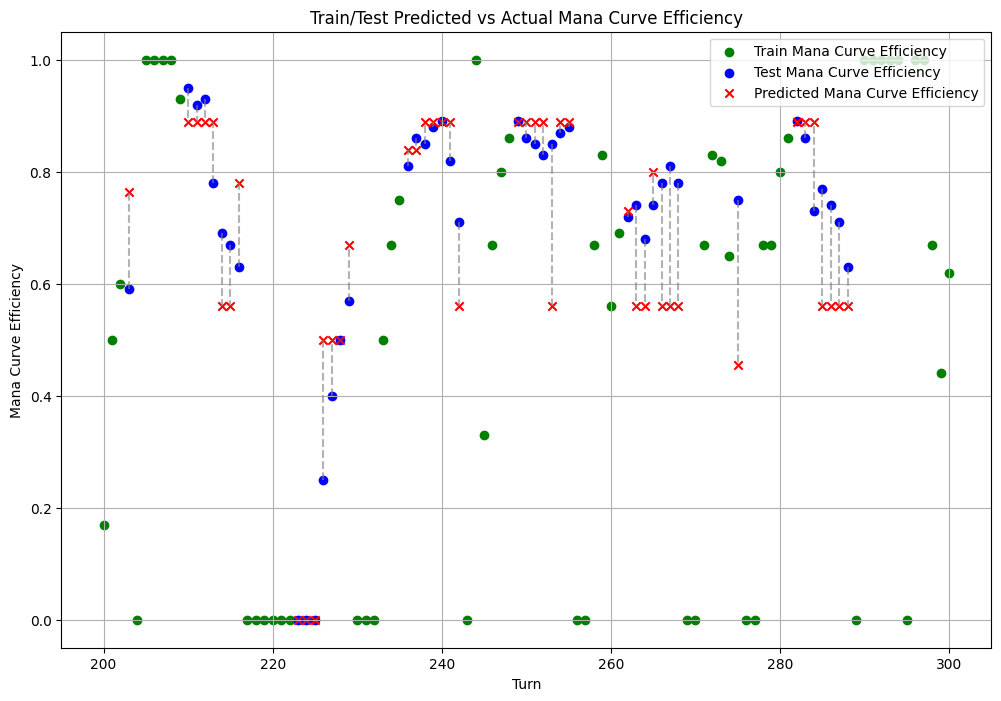

In [56]:
import matplotlib.pyplot as plt
import pandas as pd

train_features = catalog.load("train_features")
test_features = catalog.load("test_features")
train_target = catalog.load("train_target")
test_target = catalog.load("test_target")
predicted_target = catalog.load("predicted_target")

import matplotlib.pyplot as plt
import pandas as pd

def plot_train_test_predicted_vs_actual(
    train_target: dict, 
    test_target: dict, 
    predicted_target: dict, 
    test_features: dict,
    turn_start: int = None,
    turn_end: int = None,
    train_label: str = 'Train Mana Curve Efficiency', 
    test_label: str = 'Test Mana Curve Efficiency'
):
    """
    Função para plotar os valores previstos versus os valores reais para treino e teste,
    incluindo a marcação das distâncias entre os valores previstos e os reais.

    Args:
        train_target (dict): Dicionário contendo os valores reais do conjunto de treino.
        test_target (dict): Dicionário contendo os valores reais do conjunto de teste.
        predicted_target (dict): Dicionário contendo os valores previstos (predicted_target).
        test_features (dict): Dicionário contendo as features de teste para extração do turno.
        turn_start (int): Turno inicial para exibir no gráfico (padrão: None para mostrar desde o início).
        turn_end (int): Turno final para exibir no gráfico (padrão: None para mostrar até o final).
        train_label (str): Legenda para o conjunto de treino (padrão: 'Train Mana Curve Efficiency').
        test_label (str): Legenda para o conjunto de teste (padrão: 'Test Mana Curve Efficiency').
    """

    # Usando os índices anteriores para obter o turno (turn)
    test_features = test_features[run_key]().reset_index().rename(columns={"index": "turn"})
    train_target = train_target[run_key]().reset_index().rename(columns={"index": "turn"})
    test_target = test_target[run_key]().reset_index().rename(columns={"index": "turn"})

    # Adicionando a informação do turno no conjunto de previsão
    predicted_target = predicted_target[run_key]()
    predicted_target = pd.concat([predicted_target, test_target["turn"]], axis=1)

    # Ordenar os DataFrames por turno
    train_target_sorted = train_target.sort_values(by="turn").reset_index(drop=True)
    test_target_sorted = test_target.sort_values(by="turn").reset_index(drop=True)
    predicted_target_sorted = predicted_target.sort_values(by="turn").reset_index(drop=True)

    # Filtrar os dados pelo turno inicial e final, se fornecidos
    if turn_start is not None:
        train_target_sorted = train_target_sorted[train_target_sorted['turn'] >= turn_start]
        test_target_sorted = test_target_sorted[test_target_sorted['turn'] >= turn_start]
        predicted_target_sorted = predicted_target_sorted[predicted_target_sorted['turn'] >= turn_start]
    
    if turn_end is not None:
        train_target_sorted = train_target_sorted[train_target_sorted['turn'] <= turn_end]
        test_target_sorted = test_target_sorted[test_target_sorted['turn'] <= turn_end]
        predicted_target_sorted = predicted_target_sorted[predicted_target_sorted['turn'] <= turn_end]

    plt.figure(figsize=(12, 8))

    # Plotando os valores reais do conjunto de treino como pontos
    plt.scatter(train_target_sorted['turn'], train_target_sorted['mana_curve_efficiency'], 
                label=train_label, color='green', marker='o')

    # Plotando os valores reais do conjunto de teste como pontos
    plt.scatter(test_target_sorted['turn'], test_target_sorted['mana_curve_efficiency'], 
                label=test_label, color='blue', marker='o')

    # Plotando os valores previstos do conjunto de teste como pontos
    plt.scatter(predicted_target_sorted['turn'], predicted_target_sorted['predicted_target'], 
                label='Predicted Mana Curve Efficiency', color='red', marker='x')

    # Adicionando linhas verticais para marcar as distâncias entre os pontos previstos e reais
    for i in range(len(predicted_target_sorted)):
        plt.plot([predicted_target_sorted['turn'].iloc[i], predicted_target_sorted['turn'].iloc[i]],
                 [test_target_sorted['mana_curve_efficiency'].iloc[i], predicted_target_sorted['predicted_target'].iloc[i]],
                 color='gray', linestyle='--', alpha=0.6)

    # Adicionando título e rótulos aos eixos
    plt.title('Train/Test Predicted vs Actual Mana Curve Efficiency')
    plt.xlabel('Turn')
    plt.ylabel('Mana Curve Efficiency')

    # Adicionando uma legenda para os gráficos
    plt.legend()

    # Posicionando a legenda no canto superior direito
    plt.legend(loc='upper right')

    # Exibindo a grade para facilitar a leitura
    plt.grid(True)
    
    # Exibir o gráfico
    plt.show()

plot_train_test_predicted_vs_actual(
    train_target, 
    test_target, 
    predicted_target, 
    test_features, 
    turn_start=200, 
    turn_end=300
)

#TODO: Salvar isso em PNG